# Week 3

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, root_mean_squared_error

In [49]:
df = pd.read_csv('house_price_dataset.csv')
df.head()

,Id,LotArea,Street,Neighborhood,YearBuilt,YearRemodAdd,RoofStyle,FullBath,HalfBath,BedroomAbvGr,GarageCars,PavedDrive,PoolArea,SalePrice
0,1,8450,Pave,CollgCr,2003,2003,Gable,2,1,3,2,Y,0,208500
1,2,9600,Pave,Veenker,1976,1976,Gable,2,0,3,2,Y,0,181500
2,3,11250,Pave,CollgCr,2001,2002,Gable,2,1,3,2,Y,0,223500
3,4,9550,Pave,Crawfor,1915,1970,Gable,1,0,3,3,Y,0,140000
4,5,14260,Pave,NoRidge,2000,2000,Gable,2,1,4,3,Y,0,250000


In [50]:
print(df.isnull().sum())

Id              0
LotArea         0
Street          0
Neighborhood    0
YearBuilt       0
YearRemodAdd    0
RoofStyle       0
FullBath        0
HalfBath        0
BedroomAbvGr    0
GarageCars      0
PavedDrive      0
PoolArea        0
SalePrice       0
dtype: int64


In [51]:
df = df.drop(columns=['Id'], errors='ignore')
df.head()

,LotArea,Street,Neighborhood,YearBuilt,YearRemodAdd,RoofStyle,FullBath,HalfBath,BedroomAbvGr,GarageCars,PavedDrive,PoolArea,SalePrice
0,8450,Pave,CollgCr,2003,2003,Gable,2,1,3,2,Y,0,208500
1,9600,Pave,Veenker,1976,1976,Gable,2,0,3,2,Y,0,181500
2,11250,Pave,CollgCr,2001,2002,Gable,2,1,3,2,Y,0,223500
3,9550,Pave,Crawfor,1915,1970,Gable,1,0,3,3,Y,0,140000
4,14260,Pave,NoRidge,2000,2000,Gable,2,1,4,3,Y,0,250000


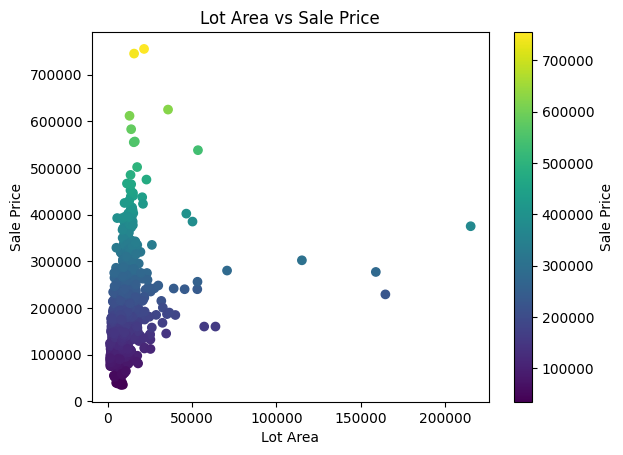

In [52]:
plt.scatter(df['LotArea'], df['SalePrice'], c=df['SalePrice'], cmap='viridis')
plt.xlabel('Lot Area')
plt.ylabel('Sale Price')
plt.colorbar(label='Sale Price')
plt.title('Lot Area vs Sale Price')
plt.show()

In [25]:
X = df['Street'].value_counts()['Pave']
Y = len(df)
print(X/Y*100)

# Justification to remove the 'Street' column:
# The 'Street' column has very little variance, with the vast majority of entries being 'Pave'.
df = df.drop(columns=['Street'], errors='ignore')
df.head()

99.58904109589041


,LotArea,Neighborhood,YearBuilt,YearRemodAdd,RoofStyle,FullBath,HalfBath,BedroomAbvGr,GarageCars,PavedDrive,PoolArea,SalePrice
0,8450,CollgCr,2003,2003,Gable,2,1,3,2,Y,0,208500
1,9600,Veenker,1976,1976,Gable,2,0,3,2,Y,0,181500
2,11250,CollgCr,2001,2002,Gable,2,1,3,2,Y,0,223500
3,9550,Crawfor,1915,1970,Gable,1,0,3,3,Y,0,140000
4,14260,NoRidge,2000,2000,Gable,2,1,4,3,Y,0,250000


In [53]:
df = pd.get_dummies(df)
df.head()

,LotArea,YearBuilt,YearRemodAdd,FullBath,HalfBath,BedroomAbvGr,GarageCars,PoolArea,SalePrice,Street_Grvl,Street_Pave,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,PavedDrive_N,PavedDrive_P,PavedDrive_Y
0,8450,2003,2003,2,1,3,2,0,208500,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True
1,9600,1976,1976,2,0,3,2,0,181500,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,True
2,11250,2001,2002,2,1,3,2,0,223500,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True
3,9550,1915,1970,1,0,3,3,0,140000,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True
4,14260,2000,2000,2,1,4,3,0,250000,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True


In [54]:
X = df.drop("SalePrice", axis=1)
Y = df["SalePrice"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [55]:
model = LinearRegression()
model.fit(X_train, Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [56]:
# R-squared is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an 
# independent variable or variables in a regression model.

Y_pred = model.predict(X_test)

# The R-squared value indicates how well the model explains the variability of the response data around its mean.
r2 = r2_score(Y_test, Y_pred)
print(f'R-squared: {r2}')

# The RMSE value provides a measure of how accurately the model predicts the response, with lower values indicating better fit.
rmse = root_mean_squared_error(Y_test, Y_pred)
print(f'Root Mean Squared Error: {rmse}')



R-squared: 0.716450022978177
Root Mean Squared Error: 44481.887612493105
